In [77]:
import os
import cv2
import numpy as np
import sklearn as sk
import keras
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tensorflow.keras.utils
import imutils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import io
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [78]:

# 1
# Do image rotation etc to increase training size


In [79]:
categories = ["One", "None"]
dataDirectory = "../../../../HandsData/OpenCVHandsData/"

sizeX = 60
sizeY = 100

In [80]:
def resize(image):
    
    h, w, ch = image.shape
    
    zeros = np.zeros((sizeY, sizeX, 3))
    
    tempImage = image.copy()
    
    image = imutils.resize(tempImage, height=sizeY)
    if image.shape[1] > sizeX:
        image = imutils.resize(tempImage, width=sizeX)
    
    zeros[:image.shape[0], :image.shape[1]] = image
    
    #print()
    
    return zeros

In [81]:
X = []
y = []

for category in categories:
    
    path = dataDirectory + category + "/Combined"
    
    for image in tqdm(os.listdir(path)[::2]):
        
        image = cv2.imread(path + '/' + image)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image = resize(image)
        
        X.append(image)
        y.append(categories.index(category))
        

100%|█████████████████████████████████████████████████████████████████████████████| 1514/1514 [00:05<00:00, 269.20it/s]


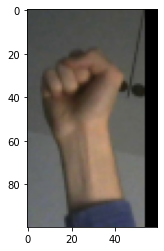

In [82]:
plt.imshow(X[1670].astype(np.uint8))
plt.show()

In [83]:
X = np.array(X)

y = tf.keras.utils.to_categorical(np.asarray(y))

print(X.shape)
print(y)

X = X.reshape(-1, sizeX, sizeY, 3)

(3116, 100, 60, 3)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

print(y_train)
print(X_train[0][0][:5])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[[90. 91. 89.]
 [89. 89. 90.]
 [94. 93. 95.]
 [93. 94. 90.]
 [91. 92. 85.]]


(60, 100, 3)


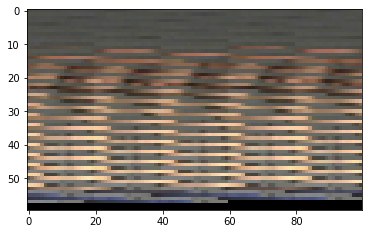

In [85]:
print(X_test[0].shape)

plt.imshow(X_test[0].astype(np.uint8))
plt.show()

In [86]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 58, 98, 16)        448       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 29, 49, 16)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 29, 49, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 27, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 23, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 13, 23, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 21, 64)      

In [87]:
print(X_train.shape)
print(y_train.shape)

(2337, 60, 100, 3)
(2337, 2)


In [88]:
#Data Augmentation

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

train_aug = aug.flow(X_train, y_train, batch_size=4)


In [89]:
history = model.fit(train_aug, verbose=2, epochs=100)

Epoch 1/100
585/585 - 8s - loss: 2.4057 - accuracy: 0.5875
Epoch 2/100
585/585 - 7s - loss: 0.6500 - accuracy: 0.6504
Epoch 3/100
585/585 - 7s - loss: 0.6276 - accuracy: 0.6611
Epoch 4/100
585/585 - 7s - loss: 0.6166 - accuracy: 0.6602
Epoch 5/100
585/585 - 7s - loss: 0.6075 - accuracy: 0.6641
Epoch 6/100
585/585 - 7s - loss: 0.6048 - accuracy: 0.6709
Epoch 7/100
585/585 - 7s - loss: 0.6159 - accuracy: 0.6782
Epoch 8/100
585/585 - 7s - loss: 0.6021 - accuracy: 0.6816
Epoch 9/100
585/585 - 7s - loss: 0.5882 - accuracy: 0.6876
Epoch 10/100
585/585 - 7s - loss: 0.6036 - accuracy: 0.6799
Epoch 11/100
585/585 - 7s - loss: 0.5874 - accuracy: 0.6885
Epoch 12/100
585/585 - 7s - loss: 0.5942 - accuracy: 0.6748
Epoch 13/100
585/585 - 7s - loss: 0.6091 - accuracy: 0.6628
Epoch 14/100
585/585 - 7s - loss: 0.5828 - accuracy: 0.6804
Epoch 15/100
585/585 - 7s - loss: 0.5759 - accuracy: 0.6911
Epoch 16/100
585/585 - 7s - loss: 0.6008 - accuracy: 0.6744
Epoch 17/100
585/585 - 7s - loss: 0.5726 - accura

In [90]:
# Saves all the models for future reference

version = 1
modelDir = "Model Versions/HandModelV"

while True:
    try:
        f = open(modelDir + str(version) + ".h5", 'r')
        f.close()
        version = version + 1
    except:
        break
    
model.save(modelDir + str(version) + ".h5")

In [91]:
pred_hot = model.predict(X_test)

pred = np.argmax(pred_hot, axis=1)

y_compare = np.argmax(y_test, axis=1)

score = metrics.accuracy_score(y_compare, pred)

print("Accuracy score: {}".format(score))

#print(pred_hot[:5])
#print(pred)

Accuracy score: 0.9178433889602053


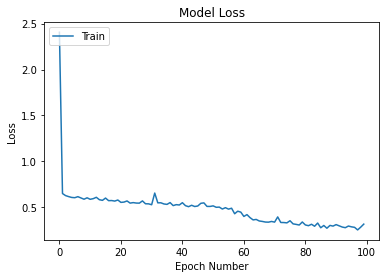

In [92]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['Train'], loc='upper left')
plt.show()

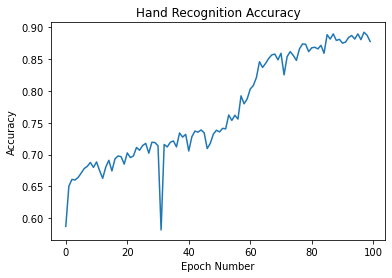

In [93]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Hand Recognition Accuracy')
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.show()

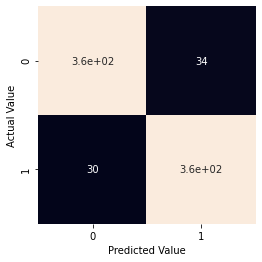

In [94]:
mat = confusion_matrix(pred, y_compare)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()